# ML Feature engineering - Univariate Feature Selection

In [1]:
%matplotlib inline
%run talibref.py
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

### Get data

In [2]:
#df=pd.read_csv("data/IYZ.csv")
ticker = 'IYZ'
startdate=datetime.date(2010, 1, 1)
enddate=datetime.date.today()
df = generate_ticker_data(ticker, startdate, enddate)

Available data: Ticker(IYZ) from 2000.05.26 to 2015.11.27
Usable data: Ticker(IYZ) from 2001.03.14 to 2015.11.27 
Returned data: Ticker(IYZ) from 2010.01.04 to 2015.11.27 
Save path: data/IYZ_from_2010.01.04_2015.11.27.csv


In [3]:
dftouse=df.copy()

### Feature Engineering

In [4]:
IGNORE = ['date', 'result_1','close_1','perf_1','result_14','close_14','perf_14','results']

In [5]:
INDICATORS=[]
for v in df.columns:
    l=df[v].unique()
    if len(l) <= 10 and v not in IGNORE:
        #print v, l
        INDICATORS.append(v)

In [6]:
STANDARDIZABLE = []
for v in df.columns:
    if v not in INDICATORS and v not in IGNORE:
        #print v
        STANDARDIZABLE.append(v)

In [7]:
dftouse['date'] = pd.to_datetime(dftouse['date'])
mask = (dftouse.date < '2015-01-01').values
mask.shape, mask.sum()

((1487,), 1258)

#### 1.2 Standardize the data

Use the mask to compute the training and test parts of the dataframe. Use `StandardScaler` from `sklearn.preprocessing` to "fit" the columns in `STANDARDIZABLE` on the training set. Then use the resultant estimator to transform both the training and the test parts of each of the columns in the dataframe, replacing the old unstandardized values in the `STANDARDIZABLE` columns of `dftouse` by the new standardized ones.

In [8]:
#your code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dftouse[mask][STANDARDIZABLE])
dftouse[STANDARDIZABLE] = scaler.transform(dftouse[STANDARDIZABLE])
dftouse.head()

,date,open,high,low,close,volume,close_1,result_1,perf_1,close_14,result_14,perf_14,results,bb_upper,bb_middle,bb_lower,bb_pct,bb_bandwidth,bb_squeeze,bb_signalup,bb_signaldn,bb_signal,ema50,ema150,ema200,ema_signal1,ema_signal2,kama50,kama150,kama200,kama_signal1,kama_signal2,sar,sar_signal,adx,plus_di,minus_di,adx_trend,adx_direction,adx_signal,aroon_osc,aroon_signal,cci,cci_signal,macd,macd_sigline,macd_hist,macd_signal,ppo,ppo_signal,mfi,mfi_signal,roc,roc_signal,rsi,rsi_signal,ult_osc,ult_signal,willr,wr_signal,ad_osc,ad_signal,stoch_slowk,stoch_slowd,sslow_signal,stoch_fastk,stoch_fastd,srsi_signal,trix,trix_signal,sr_pivotpts,sr_res1,sr_sup1,sr_res2,sr_sup2,sr_res3,sr_sup3,cv_signal
0,2010-01-04,-1.169181,-1.157299,-1.15216,-1.118360,0.639008,20.680000,True,0.006326,18.719999,False,-0.089051,0,-1.321332,-1.279148,-1.221656,1.341702,-0.221542,False,True,False,0,-1.460919,-1.606757,-1.590867,1,1,-1.591087,-1.687069,-1.676153,1,1,-1.257753,1,1.219553,1.264466,-1.068669,True,True,1,1.313898,1,1.004782,1,1.390227,1.549988,-0.096380,0,1.164215,1,1.561731,0,1.442156,0,1.356830,0,0.191720,0,1.334246,0,1.564001,1,-0.269844,-0.148049,0,0.698039,-0.732738,0,1.451422,1,-1.142985,-0.827349,-0.890331,-1.051099,-1.175919,-0.728905,-0.909411,0
1,2010-01-05,-1.101747,-1.098349,-1.09877,-1.081848,2.142760,20.340000,False,-0.016441,18.900000,False,-0.086074,0,-1.296796,-1.260871,-1.209938,1.443046,-0.155418,False,True,False,0,-1.444752,-1.598041,-1.584059,1,1,-1.563987,-1.675790,-1.662338,1,1,-1.241792,1,1.295293,1.656456,-1.216766,True,True,1,1.378875,1,1.253799,1,1.457677,1.555591,0.078078,1,1.171118,1,1.645223,0,1.297461,0,1.505069,0,0.626544,0,1.120493,0,1.930265,1,0.257237,-0.227046,0,1.139066,0.256536,0,1.519308,1,-1.093350,-0.737175,-0.851602,-0.950513,-1.179561,-0.593715,-0.921427,0
2,2010-01-06,-1.070840,-1.106770,-1.15216,-1.177339,1.022456,20.260000,False,-0.003933,18.600000,False,-0.085546,0,-1.287113,-1.253220,-1.204436,0.550893,-0.134384,False,False,False,0,-1.433052,-1.590782,-1.578353,1,1,-1.545047,-1.666641,-1.653785,1,1,-1.217674,1,1.252893,1.079920,-0.845719,True,True,1,1.313898,1,0.658914,1,1.379371,1.543035,-0.108883,0,1.160075,1,1.403751,0,0.314070,0,0.703464,0,0.062437,0,0.212042,0,1.387529,1,0.803962,0.284918,0,-0.973098,0.361669,1,1.580734,1,-1.145794,-0.878748,-0.952477,-1.042869,-1.189577,-0.767654,-0.978934,0
3,2010-01-07,-1.177611,-1.205021,-1.18307,-1.199808,0.113814,20.110001,False,-0.007404,18.570000,False,-0.083416,0,-1.284341,-1.244436,-1.189654,0.302612,-0.202750,False,False,False,0,-1.422711,-1.583935,-1.572947,1,1,-1.525456,-1.658651,-1.645185,1,1,-1.195968,1,1.153228,0.830531,-0.626599,True,True,1,1.248921,1,0.087822,1,1.273312,1.509911,-0.320626,0,1.071905,1,1.155536,0,-0.190918,0,0.532015,0,-0.094744,0,-0.001712,0,0.971730,1,-0.050296,0.363990,0,-1.224255,-0.442993,1,1.634198,1,-1.196366,-0.976136,-1.049750,-1.092248,-1.238745,-0.860651,-1.071632,1
4,2010-01-08,-1.202899,-1.241514,-1.22241,-1.241936,0.324656,20.150000,True,0.001989,18.400000,False,-0.085032,0,-1.286142,-1.238202,-1.175341,-0.118472,-0.292838,False,False,False,0,-1.414467,-1.577770,-1.568050,1,1,-1.511082,-1.651729,-1.637589,1,1,-1.000611,0,0.987992,0.570148,-0.335794,True,True,1,1.183944,1,-0.563369,1,1.123685,1.450854,-0.587622,0,0.933880,1,1.037445,0,-0.128574,0,0.216803,0,-0.062344,0,-0.417092,0,0.579160,1,-1.024149,-0.097513,0,-1.224255,-1.432267,1,1.677407,1,-1.235698,-1.051881,-1.125406,-1.130653,-1.276986,-0.932983,-1.143730,0


We create a list `lcols` of the columns we will use in our classifier. This list should not contain the response `RESP`. How many features do we have?

In [9]:
#lcols=list(dftouse.columns)
#lcols.remove(u'results')
lcols=[]
for c in list(dftouse.columns):
    if c not in IGNORE: 
        lcols.append(c)
print len(lcols)

70


### EDA for the data

We create a variable `ccols` which contains all variables not in our indicators list

In [10]:
ccols=[]
for c in lcols:
    if c not in INDICATORS and c not in IGNORE:
        ccols.append(c)
print len(ccols), len(INDICATORS)

44 26


In [11]:
def cv_optimize(clf, parameters, X, y, n_folds, score_func):
    fitmodel = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    fitmodel.fit(X, y)
    return fitmodel.best_estimator_

In [12]:
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        #print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        #print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    #print "############# based on standard predict ################"
    #print "Accuracy on training data: %0.2f" % (training_accuracy)
    #print "Accuracy on test data:     %0.2f" % (test_accuracy)
    #print confusion_matrix(ytest, clf.predict(Xtest))
    #print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [13]:
X=dftouse[lcols].values
y=dftouse['results'].values
Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]  
reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

In [14]:
print "whole data set", dftouse['results'].mean()
print "training set", dftouse['results'][mask].mean(), "test set", dftouse['results'][~mask].mean()

whole data set 0.465366509751
training set 0.467408585056 test set 0.454148471616


### Univariate Feature Selection

In [15]:
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression

def evaluate(clf):
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    df_pred = df[~mask].reset_index(drop=True)
    df_pred['pred_result'] = clf.predict(Xtest)
    df_pred['result_baseline'] = np.ones(df_pred.shape[0])
    
    _,_,ROI_base,_,_ = evaluate_profit(df_pred,startdate, enddate, 10000, 'result_baseline', 'close', False, [1])
    _,_,ROI_long,_,_ = evaluate_profit(df_pred, startdate, enddate,10000, 'pred_result', 'close', False,[1])
    _,_,ROI_lgst,_,_ = evaluate_profit(df_pred,startdate, enddate, 10000, 'pred_result', 'close', False,[1,0])
    return training_accuracy, test_accuracy, ROI_base, ROI_long, ROI_lgst

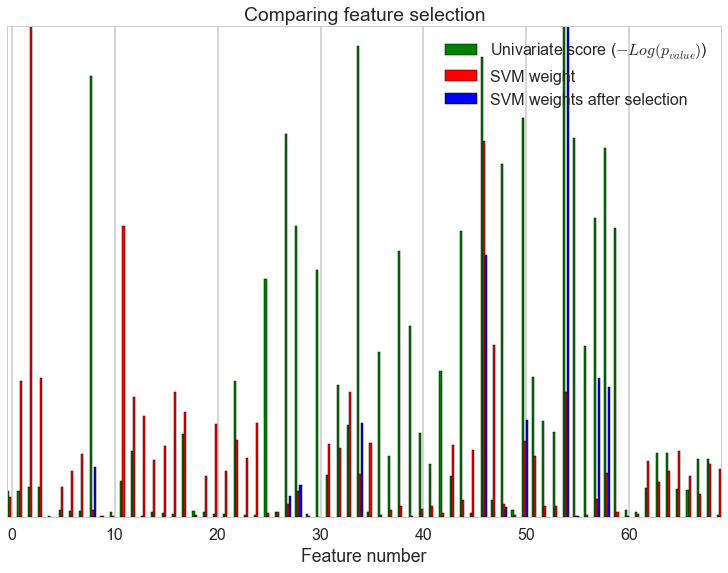

In [35]:
featuredf = pd.DataFrame({'feature':lcols})

# Code/logic from http://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html
from sklearn import svm
from sklearn.feature_selection import SelectPercentile, f_classif

###############################################################################
plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])

###############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 15% most significant features
selector = SelectPercentile(f_classif, percentile=15)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
featuredf['uscore'] = scores
scores /= scores.max()
featuredf['uscore_scaled'] = scores
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='g')

###############################################################################
# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
featuredf['svm_weight'] = svm_weights
svm_weights /= svm_weights.max()
featuredf['svm_weight_scaled'] = svm_weights

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight', color='r')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

featuredf.sort(['uscore'], ascending=False, inplace=True)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
#selfeaturedf = pd.DataFrame(featuredf['feature'][:len(svm_weights_selected)])
selfeaturedf = featuredf[:len(svm_weights_selected)].copy()
selfeaturedf['svm_weight_sel'] = svm_weights_selected
svm_weights_selected /= svm_weights_selected.max()
selfeaturedf['svm_weight_sel_scaled'] = svm_weights_selected

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='b')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

In [37]:
featuredf.head()

,feature,uscore,uscore_scaled,svm_weight,svm_weight_scaled
54,stoch_slowk,51.743668,1.000000,0.618812,0.254092
34,cci,49.578409,0.958154,0.209431,0.085995
46,rsi,48.413728,0.935645,1.864455,0.765568
8,bb_pct,46.378561,0.896314,0.031191,0.012807
50,willr,42.027950,0.812234,0.372777,0.153067


In [39]:
selfeaturedf

,feature,uscore,uscore_scaled,svm_weight,svm_weight_scaled,svm_weight_sel,svm_weight_sel_scaled
54,stoch_slowk,51.743668,1.000000,0.618812,0.254092,0.079891,0.100071
34,cci,49.578409,0.958154,0.209431,0.085995,0.034169,0.042800
46,rsi,48.413728,0.935645,1.864455,0.765568,0.051481,0.064484
8,bb_pct,46.378561,0.896314,0.031191,0.012807,0.152905,0.191527
50,willr,42.027950,0.812234,0.372777,0.153067,0.424687,0.531960
27,plus_di,40.264751,0.778158,0.063847,0.026217,0.015463,0.019369
55,stoch_slowd,39.889556,0.770907,0.000871,0.000358,0.156342,0.195832
58,stoch_fastd,38.833929,0.750506,0.218445,0.089696,0.798344,1.000000
48,ult_osc,37.205160,0.719028,0.061701,0.025335,0.000164,0.000205
57,stoch_fastk,31.436534,0.607544,0.086739,0.035616,0.224793,0.281575
